In [85]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [86]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

Overall, the column names seem to be very wordy. This makes using pandas difficult. I would suggest shortening them and making a dictionary from the original version to the shortened version.

In [87]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [88]:
star_wars.rename(columns={'Have you seen any of the 6 films in the Star Wars franchise?':'seen_any'}, inplace=True)
star_wars['seen_any'].value_counts()

Yes    936
No     250
Name: seen_any, dtype: int64

In [89]:
Yes_No_TF_map = {'Yes':True, 'No':False}
star_wars['seen_any'] = star_wars['seen_any'].map(Yes_No_TF_map)
print(star_wars['seen_any'].value_counts())

True     936
False    250
Name: seen_any, dtype: int64


In [90]:
len(star_wars['seen_any'])

1186

In [91]:
star_wars.rename(columns={'Do you consider yourself to be a fan of the Star Wars film franchise?':'is_fan'}, inplace=True)
star_wars['is_fan'].value_counts()

Yes    552
No     284
Name: is_fan, dtype: int64

In [92]:
star_wars['is_fan'] = star_wars['is_fan'].map(Yes_No_TF_map)
star_wars['is_fan'].value_counts()

True     552
False    284
Name: is_fan, dtype: int64

In [93]:
star_wars[['is_fan', 'seen_any']].head(15)

,is_fan,seen_any
0,True,True
1,NaN,False
2,False,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,False,True


In [94]:
seen_map = {
    'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'
}
star_wars.rename(columns=seen_map, inplace=True)
print(star_wars.columns)

Index(['RespondentID', 'seen_any', 'is_fan', 'seen_1', 'seen_2', 'seen_3',
       'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Loca

In [95]:
import numpy as np
for i in range(3,9):
    star_wars.iloc[:, i] = ~star_wars.iloc[:, i].isna()
print(star_wars.iloc[:, 3:9])

      seen_1  seen_2  seen_3  seen_4  seen_5  seen_6
0       True    True    True    True    True    True
1      False   False   False   False   False   False
2       True    True    True   False   False   False
3       True    True    True    True    True    True
4       True    True    True    True    True    True
...      ...     ...     ...     ...     ...     ...
1181    True    True    True    True    True    True
1182    True    True    True    True    True    True
1183   False   False   False   False   False   False
1184    True    True    True    True    True    True
1185    True    True   False   False    True    True

[1186 rows x 6 columns]


In [96]:
print(star_wars.iloc[:, 3:9].isna().sum())

seen_1    0
seen_2    0
seen_3    0
seen_4    0
seen_5    0
seen_6    0
dtype: int64


In [97]:
ranking_col_map = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
}
star_wars.rename(columns=ranking_col_map, inplace=True)
print(star_wars.columns)

Index(['RespondentID', 'seen_any', 'is_fan', 'seen_1', 'seen_2', 'seen_3',
       'seen_4', 'seen_5', 'seen_6', 'ranking_1', 'ranking_2', 'ranking_3',
       'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')


In [98]:
for i in range(9,15):
    star_wars.iloc[:, i] = star_wars.iloc[:, i].astype(float)
print(star_wars.iloc[:, 9:15])

      ranking_1  ranking_2  ranking_3  ranking_4  ranking_5  ranking_6
0           3.0        2.0        1.0        4.0        5.0        6.0
1           NaN        NaN        NaN        NaN        NaN        NaN
2           1.0        2.0        3.0        4.0        5.0        6.0
3           5.0        6.0        1.0        2.0        4.0        3.0
4           5.0        4.0        6.0        2.0        1.0        3.0
...         ...        ...        ...        ...        ...        ...
1181        5.0        4.0        6.0        3.0        2.0        1.0
1182        4.0        5.0        6.0        2.0        3.0        1.0
1183        NaN        NaN        NaN        NaN        NaN        NaN
1184        4.0        3.0        6.0        5.0        2.0        1.0
1185        6.0        1.0        2.0        3.0        4.0        5.0

[1186 rows x 6 columns]


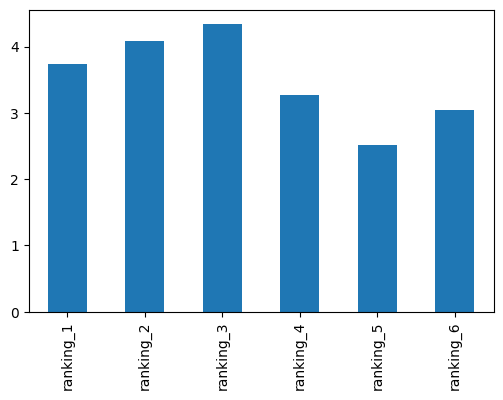

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt

rankings_averaged = star_wars.iloc[:, 9:15].mean(axis=0)
rankings_averaged.plot.bar()

# Ranking interpretation
It seems the original movies (4,5,6) were ranked higher than their subsequent prequels (1,2,3)
* rankings peaked at 4 (Star Wars: Episode V The Empire Strikes Back)
* rankings declined for all releases after it peaked

# My actions overview
So far I've renamed some columns and cleaned some entries to make the data more intuitve.

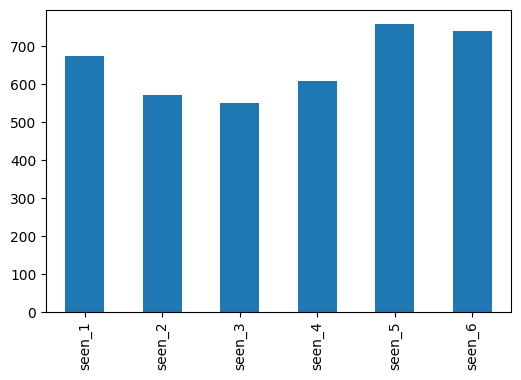

In [100]:
star_wars.iloc[:, 3:9].sum(axis=0).plot.bar()

# Viewership Analysis
The rankings are reinforced by the viewership.
Less people watched the prequels (1,2,3) than the originals (3,5,6).

In [101]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

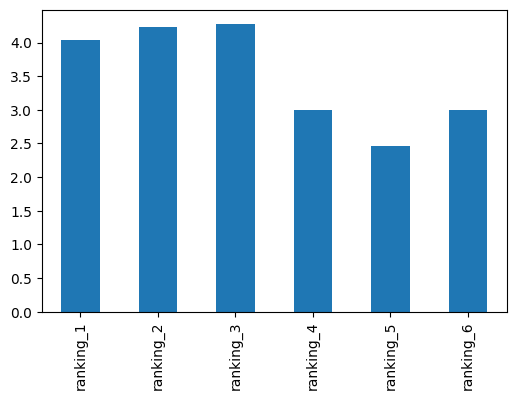

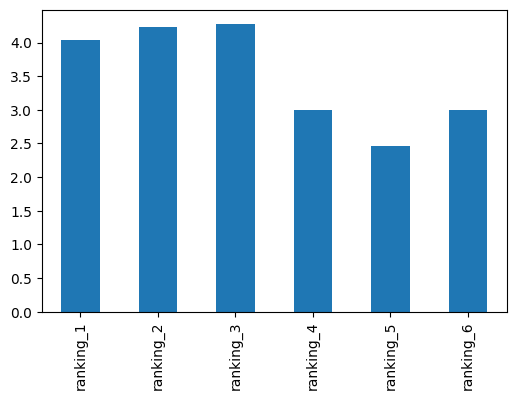

In [103]:
male_rankings = males.iloc[:, 9:15].mean(axis=0)
male_rankings.plot.bar()
plt.show()

male_viewership = males.iloc[:, 9:15].mean(axis=0)
male_viewership.plot.bar()
plt.show()

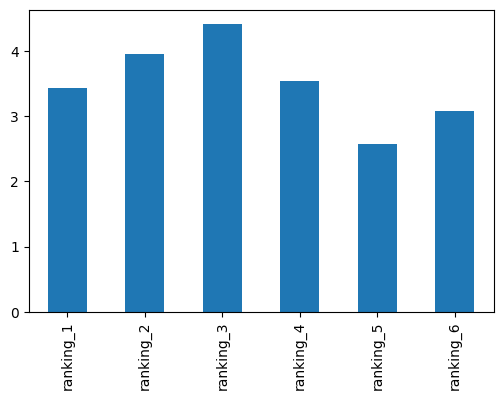

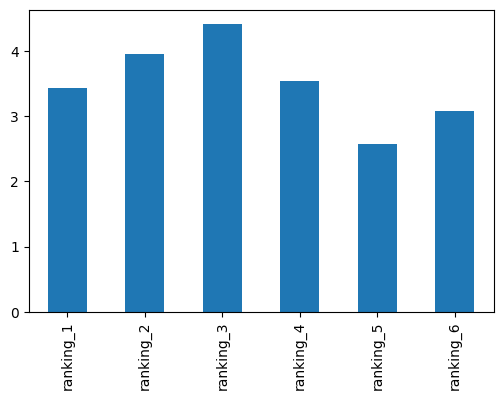

In [104]:
female_rankings = females.iloc[:, 9:15].mean(axis=0)
female_rankings.plot.bar()
plt.show()

female_viewership = females.iloc[:, 9:15].mean(axis=0)
female_viewership.plot.bar()
plt.show()

# Male vs Female Preferences
More males watched the prequels (1,2,3). More males also disliked the prequels. We would expect to have an inverse relation with these values.

Viewership & rankings for the original movies (4,5,6) were roughly equal across the board.